In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

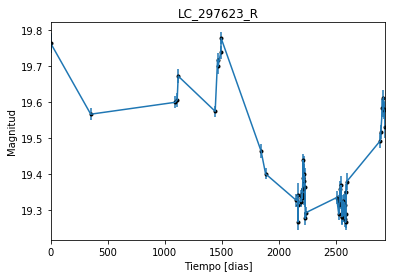

In [2]:
data = np.genfromtxt('LC_297623_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_297623_R')
plt.savefig("LC_297623_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

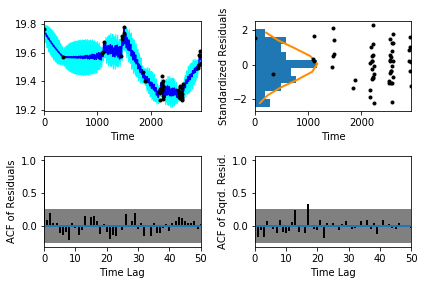

In [5]:
sample.assess_fit()

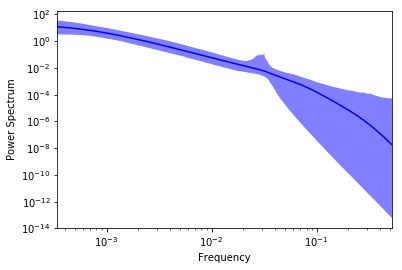

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

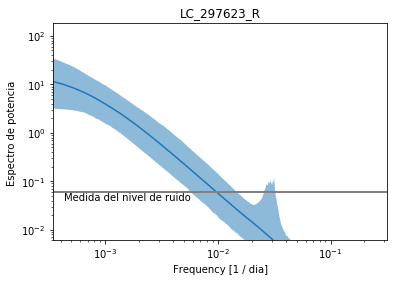

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_297623_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_297623_R')

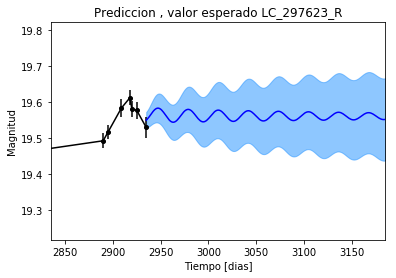

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_297623_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_297623_R')

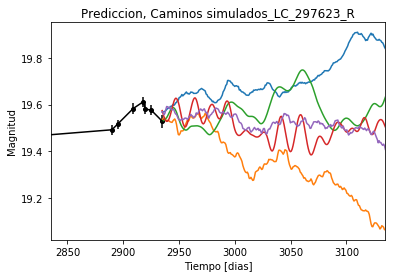

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_297623_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


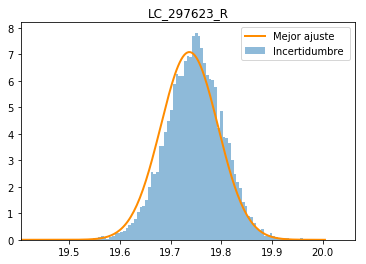

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_297623_R')
plt.savefig("Mejor_ajuste_LC_297623_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_297623_R')

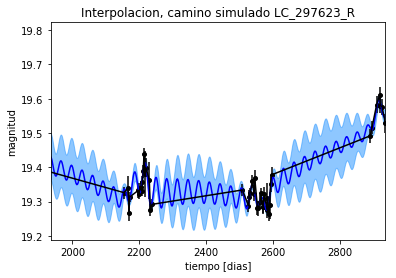

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_R')

Text(0.5,1,'Interpolacion, camino simulado LC_297623_R')

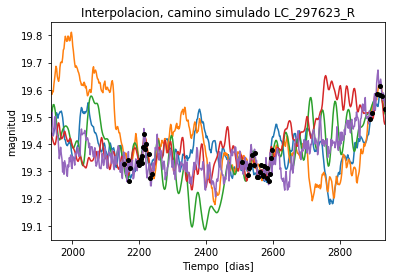

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_297623_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 322.493138868
Median: 0.0272234629625
Standard deviation: 0.221482931172
68% credibility interval: [ 0.00236571  0.27541823]
95% credibility interval: [  4.90301351e-04   8.35986981e-01]
99% credibility interval: [  3.64132710e-04   9.97295781e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 665.969113388
Median: 0.0164468633438
Standard deviation: 0.110628382807
68% credibility interval: [ 0.00118188  0.09930253]
95% credibility interval: [  4.00881655e-04   4.06402306e-01]
99% credibility interval: [  3.56704799e-04   6.97277031e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 321.830152162
Median: 0.115839415447
St

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 570.876776302
Median: 114.219733005
Standard deviation: 1.82273433412
68% credibility interval: [ 112.27422335  115.52570935]
95% credibility interval: [ 109.68078448  117.05456446]
99% credibility interval: [ 107.39731299  117.66430245]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 271.444278283
Median: 1.64277418516
Standard deviation: 2.76629857325
68% credibility interval: [ 0.32645769  5.68853802]
95% credibility interval: [ 0.06427319  9.78413721]
99% credibility interval: [  0.03656984  12.29655243]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 357.552876023
Median: 3.11669238865
Standard deviation: 12.8557214362
68% credibility interval: [  0.12066111  21.22837188]
95% credibility interval: [  3.62605776e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 11717.1342036
Median: 7.31957540797e-41
Standard deviation: 5.11472399199e+30
68% credibility interval: [  3.96412174e-87   1.15166571e-09]
95% credibility interval: [  5.62881737e-164   2.33090243e+000]
99% credibility interval: [  3.73614829e-182   1.61599136e+003]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1914.67956983
Median: 19.539939418
Standard deviation: 0.0789156642338
68% credibility interval: [ 19.46818094  19.61568764]
95% credibility interval: [ 19.38496884  19.70292922]
99% credibility interval: [ 19.31454955  19.76794702]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 284.786545901
Median: 0.0705274076282
Standard deviation: 0.29745030736
68% credibility interval: [ 0.          0.59958896]
95% credibility interval: [ 0.          0.97436797]
99% credibility interval: [ 0.          1.02457651]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 284.786545901
Median: 0.0705274076282
Standard deviation: 0.29745030736
68% credibility interval: [ 0.          0.59958896]
95% credibility interval: [ 0.          0.97436797]
99% credibility interval: [ 0.          1.02457651]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1914.5845558
Median: 0.0
Standard deviation: 0.000137518815028
68% credi

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 570.876776302
Median: 114.219733005
Standard deviation: 1.82273433412
68% credibility interval: [ 112.27422335  115.52570935]
95% credibility interval: [ 109.68078448  117.05456446]
99% credibility interval: [ 107.39731299  117.66430245]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 5880.01571024
Median: 0.0295333699507
Standard deviation: 0.0170898130581
68% credibility interval: [ 0.01904888  0.04651758]
95% credibility interval: [ 0.01330606  0.07562958]
99% credibility interval: [ 0.01077865  0.10868001]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1608.50949915
Median: 0.998601091862
Standard deviation: 0.182547574426
68% credibility interval: [ 0.83064701  1.18074188]
95% credibility interval: [ 0.6998912   1.41897086]
99% credibility interval: [ 0.62423774  1.58273665]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 574.140236821
Median: 0.0146326742884
Standard deviation: 0.354656712271
68% credibility interval: [ 0.00033668  0.19826847]
95% credibility interval: [  2.45844405e-05   1.03396846e+00]
99% credibility interval: [  4.19209313e-06   2.65586376e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 322.493138868
Median: (-0.171050062496-0.770203074314j)
Standard deviation: 2.33013326279
68% credibility interval: [-1.73050379+0.j         -0.01486420-0.20755071j]
95% credibility interval: [ -5.25266111e+00+0.j          -3.08065425e-03-0.21862373j]
99% credibility interval: [ -6.26619420e+00+0.j          -2.28791329e-03-5.82802663j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 665.969113388
Median: (-0.103338690111+0.335961124309j)
Standard deviation: 1.99401144356
68% credibility interval: [-0.62393617+1.99844895j -0.00742597+0.18854931j]
95% credibility interval: [ -2.55350100e+00+0.j  -2.51881372e-03+0.j]
99% credibility interval: [ -4.38112080e+00+1.36616494j  -2.24124235e-03+5.8683551j ]
Posterior summary fo